# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

<hr>

# Assignment 6 - Charles Alders

## Imports and Reading Data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
from scipy.spatial.distance import pdist, squareform

In [72]:
movies = pd.read_csv("/Users/charliealders/Desktop/Charlie/GitHub/MSDS600/Week6/movies.csv", index_col=0)
ratings = pd.read_csv("/Users/charliealders/Desktop/Charlie/GitHub/MSDS600/Week6/ratings.csv")

## Merging data and analyzing user 2

In [73]:
df = movies.merge(ratings, how="outer", on="movieId")
user_2 = df[df["userId"]==2]
user_2.set_index("movieId", inplace=True)
user_2.head()

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,2.0,3.0,1.445715e+09
333,Tommy Boy (1995),Comedy,2.0,4.0,1.445715e+09
1704,Good Will Hunting (1997),Drama|Romance,2.0,4.5,1.445715e+09
3578,Gladiator (2000),Action|Adventure|Drama,2.0,4.0,1.445715e+09
6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,2.0,4.0,1.445715e+09


Number of movies user two has rated:

In [74]:
user_2.shape[0]

29

In [75]:
user_2_ratings = user_2[["rating", "title"]].groupby('rating').count()

Distribution of ratings for user 2. Looks like the most common rating is 4.0, then 5.0.

<AxesSubplot:xlabel='rating'>

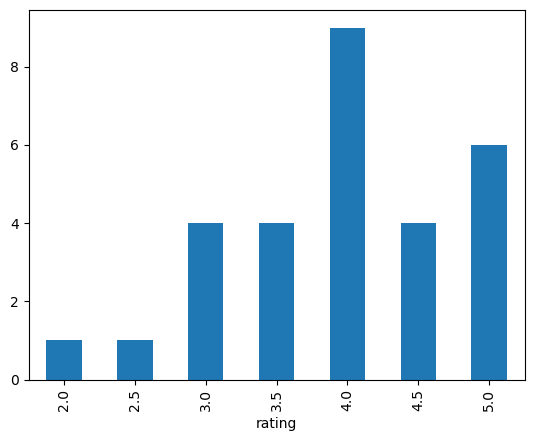

In [76]:
user_2_ratings.plot(kind='bar', legend=None)

User 2's highest rated movies are Step Brothers, Inside Job, Warrior, The Wolf of Wall Street, etc.

In [77]:
user_2[user_2['rating']==5]

,title,genres,userId,rating,timestamp
movieId,,,,,
60756,Step Brothers (2008),Comedy,2.0,5.0,1.445715e+09
80906,Inside Job (2010),Documentary,2.0,5.0,1.445715e+09
89774,Warrior (2011),Drama,2.0,5.0,1.445715e+09
106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,2.0,5.0,1.445715e+09
122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,2.0,5.0,1.445715e+09
131724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,2.0,5.0,1.445715e+09


## Similarity Metrics

In [78]:
wide_df = ratings.pivot(index='userId', columns='movieId', values='rating')
wide_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
cor = wide_df.T.corr()
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


Pearson correlation indicates that user 2 is most similar (directly correlated) to user 341, 93, 143, 148, etc.

In [80]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [81]:
wide_df.fillna(-1, inplace=True)

In [82]:
euclidean_distances = squareform(pdist(wide_df, metric=euclidean))

In [83]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide_df.index, index=wide_df.index)

In [84]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


The euclidian distances show that the 4 most similar users to user 2 are users 442, 461, 189, and 508.

In [85]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [86]:
cosine_distances = squareform(pdist(wide_df, metric=cosine))
cosine_df = pd.DataFrame(cosine_distances, columns=wide_df.index, index=wide_df.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

Euclidean and cosine distances show the same similar users, but Pearson correlation does not.

In [87]:
wide_df.replace(-1, np.NaN, inplace=True)

In [88]:
wide_df.loc[2].notna().equals(wide_df.loc[442].notna())

False

## Recommending movies

In [94]:
rated_5_by_442_not_seen_by_2 = (wide_df.loc[442] == 5) & (wide_df.loc[2].isna())

print(wide_df.loc[2][rated_5_by_442_not_seen_by_2])
(wide_df.loc[442][rated_5_by_442_not_seen_by_2])

Series([], Name: 2, dtype: float64)


Series([], Name: 442, dtype: float64)

Even though I checked to see if user 2 and user 442 had rated the exact same movies, this doesn't check to see if user 2 has watched all of the same movies than user 442, and more. The above code returns an empty string because user 2 has seen all of the same movies that user 442 has rated.

In [95]:
rated_5_by_461_not_seen_by_2 = (wide_df.loc[461] == 5) & (wide_df.loc[2].isna())

print(wide_df.loc[2][rated_5_by_461_not_seen_by_2])
(wide_df.loc[461][rated_5_by_461_not_seen_by_2])

movieId
356   NaN
Name: 2, dtype: float64


movieId
356    5.0
Name: 461, dtype: float64

In [98]:
movies.loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

User 2 and user 461 have  very close cosine distance, and user 2 has not seen Forrest Gump, which user 461 rated 5 stars. It is likely that user 2 will enjoy this movie.

In [131]:
recommended_movie_ids = []
for key, value in cosine_df.loc[2].sort_values().items():
    if not wide_df.loc[2][(wide_df.loc[key]==5) & (wide_df.loc[2].isna())].empty:
        if value < 0.05:
            recommended_movie_ids.append(wide_df.loc[2][(wide_df.loc[key]==5) & (wide_df.loc[2].isna())].index.tolist())

from functools import reduce # had to look this part up: https://www.tutorialsteacher.com/articles/how-to-flatten-list-in-python
recommended_movie_ids = reduce(lambda a,b:a+b, recommended_movie_ids)
recommended_movies = [movies["title"].loc[x] for x in recommended_movie_ids]

print(recommended_movies)

['Forrest Gump (1994)', 'Usual Suspects, The (1995)', 'Pulp Fiction (1994)', 'My Big Fat Greek Wedding (2002)', 'Arrival (2016)', 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)', 'Saving Private Ryan (1998)', 'Matrix, The (1999)', 'Fight Club (1999)', 'Memento (2000)', 'X-Men: Apocalypse (2016)']


The above list contains movies that user 2 has not seen, based on the top rated movies of users with a cosine distance of less than 0.05.

In [144]:
df[(df.userId==2) & (df.rating>=4.5)].sort_values("rating", ascending=False)

,movieId,title,genres,userId,rating,timestamp
87792,60756,Step Brothers (2008),Comedy,2.0,5.0,1.445715e+09
91890,80906,Inside Job (2010),Documentary,2.0,5.0,1.445715e+09
93512,89774,Warrior (2011),Drama,2.0,5.0,1.445715e+09
96387,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,2.0,5.0,1.445715e+09
98110,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,2.0,5.0,1.445715e+09
98721,131724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,2.0,5.0,1.445715e+09
34763,1704,Good Will Hunting (1997),Drama|Romance,2.0,4.5,1.445715e+09
86885,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2.0,4.5,1.445715e+09
89054,68157,Inglourious Basterds (2009),Action|Drama|War,2.0,4.5,1.445715e+09
91793,80489,"Town, The (2010)",Crime|Drama|Thriller,2.0,4.5,1.445715e+09


Just by looking at user 2's top genres, it looks like they enjoy Drama, Comedy, and Crime movies, as well as some documentaries. 

In [171]:
movies[["title", "genres"]][movies.index.isin(recommended_movie_ids)]

,title,genres
movieId,,
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
356,Forrest Gump (1994),Comedy|Drama|Romance|War
2028,Saving Private Ryan (1998),Action|Drama|War
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2959,Fight Club (1999),Action|Crime|Drama|Thriller
4226,Memento (2000),Mystery|Thriller
5299,My Big Fat Greek Wedding (2002),Comedy|Romance


As we can see from the recommended movies, most of them seem to be Drama, Comedy, or Crime, so it seems like user 2 would enjoy the recommended movies, just based on the genres. These recommendations are from the users with very similar interests to user 2, so I would say that the recommendations do make sense.

# Summary

This recommender system utilized cosine distance to calculate and recommend new movies to user 2 (or any user). The reason I chose cosine distance was because it showed very similar results to euclidean distance, so I figured one of those two would have more accurate results. I took the movies that user 2 had not seen that other users who had a cosine distance of less than 0.05 had rated 5 stars. I am pretty confident in the results, as these are the most similar users based on the data, and the results were quite similar to those of euclidean distance. Looking at the recommendations themselves, the new movies were lots of crime, comedy, and drama genres, which were very similar to user 2's highest rated movies.